### Decision Trees Example

#### Refernce links

#### Base documentation (scikit):
http://scikit-learn.org/stable/modules/tree.html
#### Computation and use of gini index:
https://www.researchgate.net/post/How_to_compute_impurity_using_Gini_Index
#### Pruning decision trees:
https://statinfer.com/204-3-10-pruning-a-decision-tree-in-python/

##### Install/Import required packages

In [4]:
!python -m pip install --upgrade pip

  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


In [2]:
!pip install graphviz

In [15]:
!pip show graphviz

Name: graphviz
Version: 0.8.3
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: f:\aacoda\aacoda\lib\site-packages
Requires: 
Required-by: 


In [18]:
# Add graphviz executables to system path
import os
os.environ["PATH"] += os.pathsep + 'F:/Graphviz/graphviz-2.38/release/bin'

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz

##### Load data

In [4]:
iris=datasets.load_iris()

In [88]:
i=datasets.load_iris()

In [5]:
type(iris)

sklearn.utils.Bunch

In [6]:
### Convert iris to pandas df
iris=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [7]:
type(iris)

pandas.core.frame.DataFrame

In [8]:
iris.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64

In [9]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [76]:
# Get list of column names
features=list(iris_rand_samp)

In [23]:
# Sample dataset for training
iris_rand_samp = iris.sample(frac=0.75, replace=False, random_state=1)

In [25]:
iris_rand_samp.count()

sepal length (cm)    112
sepal width (cm)     112
petal length (cm)    112
petal width (cm)     112
target               112
dtype: int64

##### Build a decision tree classifier

In [28]:
clt=tree.DecisionTreeClassifier()

In [31]:
clt=clt.fit(iris_rand_samp.loc[:,"sepal length (cm)":"petal width (cm)"], iris_rand_samp.loc[:,"target"])

In [104]:
# Check count of records for each target
iris_rand_samp.groupby(['target']).size()

target
0.0    36
1.0    36
2.0    40
dtype: int64

##### Plot tree

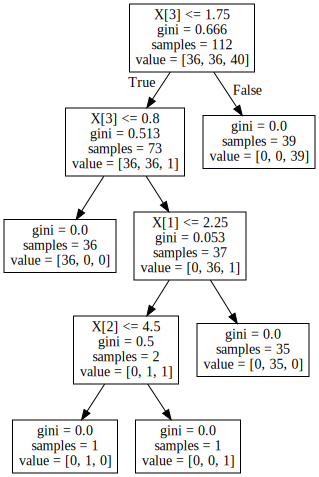

In [102]:
# Basic representation
dot_data = tree.export_graphviz(clt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

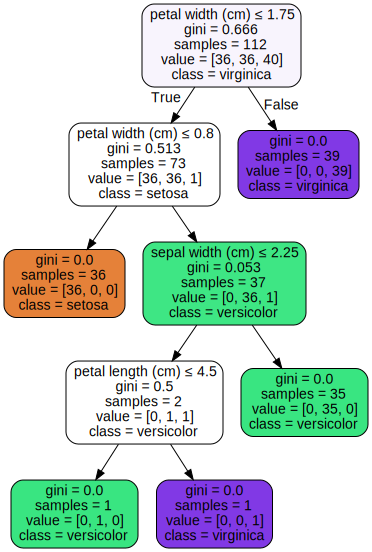

In [101]:
# Slightly fancy representation 
dot_data = tree.export_graphviz(clt, out_file=None, 
                         feature_names=features[0:len(features) - 1], 
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [110]:
clt_pruned=tree.DecisionTreeClassifier(max_depth=3)
clt_pruned=clt_pruned.fit(iris_rand_samp.loc[:,"sepal length (cm)":"petal width (cm)"], iris_rand_samp.loc[:,"target"])

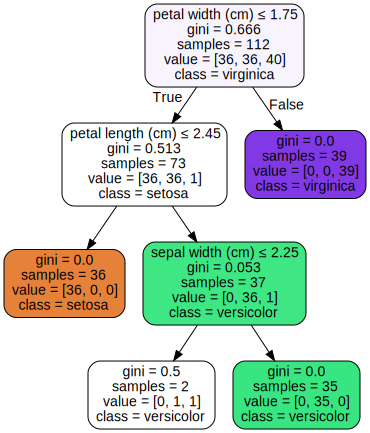

In [111]:
 dot_data = tree.export_graphviz(clt_pruned, out_file=None, 
                         feature_names=features[0:len(features) - 1],
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 